In [1]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import json

from sentinelhub import (
    SHConfig,
    CRS,
    BBox,
    DataCollection,
    Geometry,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

from utils import plot_image

c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = SHConfig()

config.sh_client_id = "43cc92ed-4c79-4d1f-8d83-39ddd1b5d2d2"
config.sh_client_secret = "j59JOW0okkn8kpMQwnTxlZy5p8Anr3nN"

if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).")

In [3]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

evalscripts = os.path.join(parent_directory, 'evalscripts')
evalscript_water_path = os.path.join(evalscripts, 'chlorophyll.js')
with open(evalscript_water_path, 'r') as file:
    evalscript_water = file.read()

In [4]:
parent_directory = os.path.dirname(current_directory)
aois_path = os.path.join(parent_directory, 'aoi')

aoi_path = os.path.join(aois_path, 'sukhna_lake.geojson')


# Load the AOI
with open(aoi_path, 'r') as file:
    aoi = json.load(file)
    
# Create a geometry object
geometry = Geometry(aoi, crs=CRS.WGS84)

In [5]:
sukhna_coords_wgs84 = (76.8, 30.73, 76.84, 30.75)
resolution = 5
sukhna_bbox = BBox(bbox=sukhna_coords_wgs84, crs=CRS.WGS84)
sukhna_size = bbox_to_dimensions(sukhna_bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {sukhna_size} pixels")

Image shape at 5 m resolution: (759, 456) pixels


In [6]:
request_true_color = SentinelHubRequest(
    evalscript=evalscript_water,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            time_interval=("2020-06-13", "2020-06-13"),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    # bbox=sukhna_bbox,
    geometry=geometry,
    size=sukhna_size,
    # size=sukhna_size,
    config=config,
)

In [7]:
true_color_imgs = request_true_color.get_data()

Image type: uint8


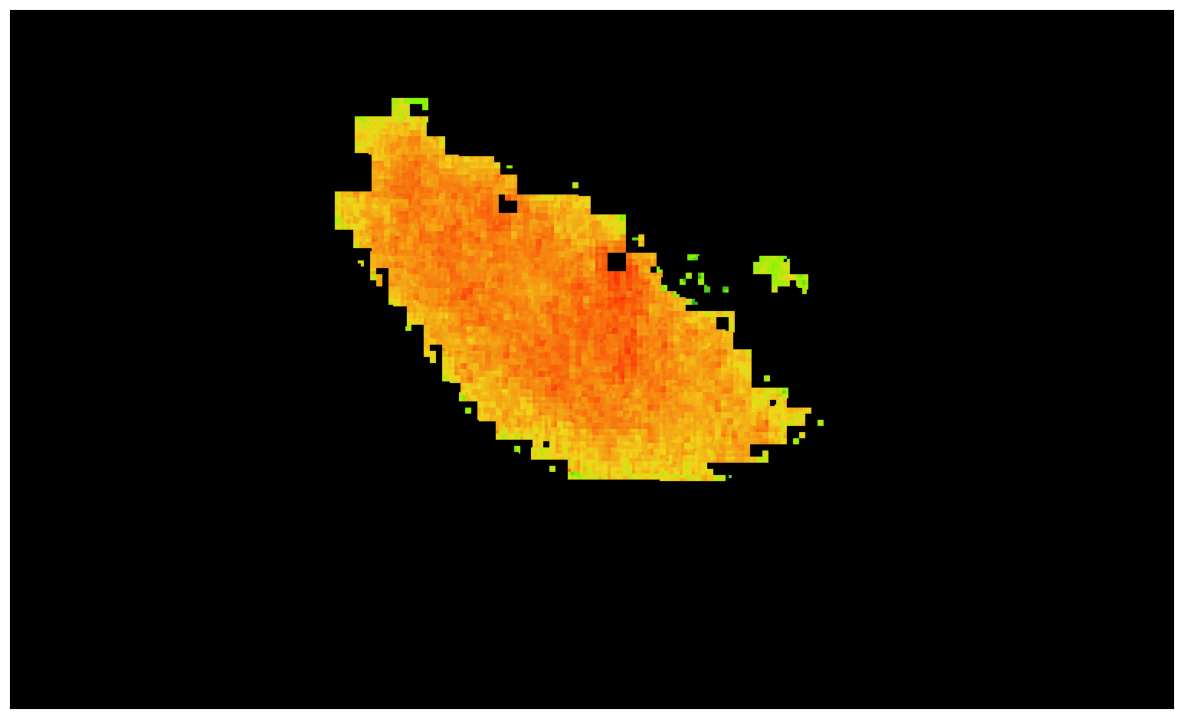

In [129]:
image = true_color_imgs[0]
print(f"Image type: {image.dtype}")

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness
plot_image(image, factor=1/255, clip_range=(0, 1))

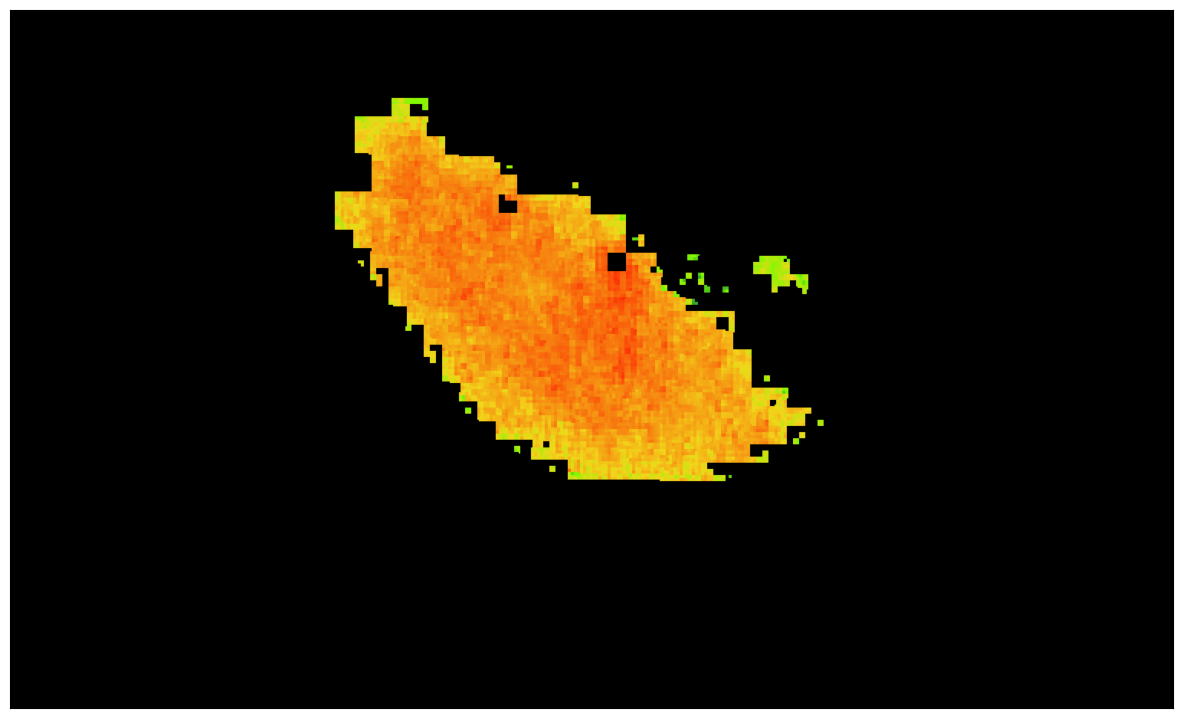

In [130]:
plot_image(image, factor=1)